# Briegman Divergence 

1. Quick intro and intuition: https://bowaggoner.com/blog/2016/09-20-convexity/ 
2. Deeper: https://mark.reid.name/blog/meet-the-bregman-divergences.html

Key things:
- Put simply the briegman divergence is a measure of how far the tangent at y is below x
- A convex function induces a briegman divergence
- The briegman divergence introducted by the negative entropy function is KL divergence. 

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from math import acos, pi
import matplotlib.pyplot as plt
    
vector_1 = [3,4]
vector_2 = [1,3]



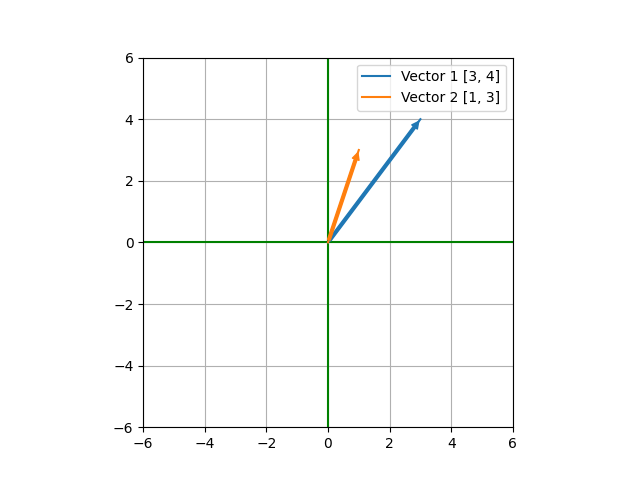

interactive(children=(IntSlider(value=3, description='v1_x', max=6, min=-6), IntSlider(value=4, description='v…

In [9]:
%matplotlib widget

import numpy as np
from math import acos, pi
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive
    
vector_1 = [3,4]
vector_2 = [1,3]

def get_label(which_vector, vector):
    """Labels a vector with its name and vector head coordinates"""
    return f"{which_vector} {vector}"

def plot_line(vector, label):    
    """Plots a vector in standard position"""
    line = plt.plot([0,vector[0]], [0, vector[1]], label=label)[0]
    
    # Draw as an arrow, as vectors are generally drawn    
    line.axes.annotate('',
        xytext=(0, 0),
        xy=(vector[0], vector[1]),       
        arrowprops=dict(color=line.get_color(), arrowstyle="simple"),
        size=10
    )

def configure_graph_grid():
    """Set up a square grid axis"""
    
    # Size
    grid_min = -6
    grid_max = 6
    
    # Make it square and set limits
    plt.axis('square')
    plt.axis(( grid_min, grid_max, grid_min, grid_max))
    
    # Plot x and y axes
    plt.plot([grid_min, grid_max], [0,0], 'g')
    plt.plot([0,0],[grid_min, grid_max], 'g')
    plt.grid()
    
def handle_event(v1_x, v1_y, v2_x, v2_y):
    """Process events from the ipywidgets.interactive handler.
       
       Argument names in the event handler must match the keys in the "interactive" call (below).       
    """
    
    # Repack the x and y coordinates into two vectors, and call do_update to process the change.
    vector1 = [v1_x, v1_y]
    vector2 = [v2_x, v2_y]
 
    do_update(vector1, vector2)  
    

def slider_config(value):
    """Return an IntSlider widget with the common configuration"""
    return widgets.IntSlider(min=-6, max=6, step=1, value=value)


def do_update(v1, v2):
    """Based on the new control state, update the interactive plot.
    
       The approach here is to clear and redraw the whole plot rather than simply to update 
       the lines. Simply setting new x and y data for the lines works in the line case, but 
       doesn't because we're drawing them as arrows.
       
    """
    figure.clf()
    configure_graph_grid()
    line_1 = plot_line(v1, get_label("Vector 1", v1))
    line_2 = plot_line(v2, get_label("Vector 2", v2))
    plt.legend()
    plt.draw()
    plt.legend()
    

    
# Display the grid and the vectors
figure = plt.figure()
configure_graph_grid()
line_1 = plot_line(vector_1, get_label("Vector 1", vector_1))
line_2 = plot_line(vector_2, get_label("Vector 2", vector_2))
plt.legend()
plt.show()
slider_controls = interactive(handle_event, 
                 v1_x=slider_config(vector_1[0]), 
                 v1_y=slider_config(vector_1[1]),
                 v2_x=slider_config(vector_2[0]), 
                 v2_y=slider_config(vector_2[1]))
display(slider_controls)

# Jensens Inequality


$$ f(E(x)) \geq E(f(x))$$

or 

$$f(\theta x_1 + (1-\theta)x_2) \geq \theta f(x_1) + (1 - \theta) f(x_2) \forall \theta \in [0,1]$$


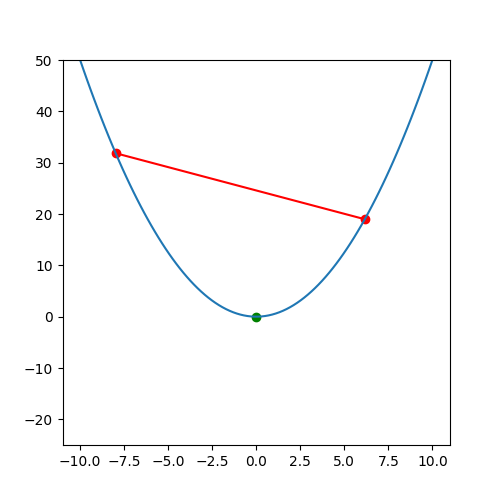

In [34]:

def f(x):
    return 0.5 * x**2 

x = np.linspace(-10,10, 100)
y = f(x)

x1 = x[10]
x2 = x[80]

fig, axs = plt.subplots(1,1,figsize=(5,5))
plt.ylim([-25,50])
axs.scatter([x1, x2], [f(x1), f(x2)], color='red')
axs.plot([x1, x2], [f(x1), f(x2)], color='red')
axs.plot(x,y)
axs.scatter([np.mean(x)], [f(np.mean(x))], color='green')
